In [28]:
import sys
sys.path.insert(0, r'C:\Users\julia\OneDrive\Documents\ML Projects\Coffee-Price-Prediction\Ignore')
import pandas as pd
from config import *

In [29]:
coffee_data = get_coffee_price()
coffee_data
df = pd.DataFrame(coffee_data['data'])
df.reset_index(inplace=True)
(df == ".").sum()

index      0
date       0
value    120
dtype: int64

In [30]:
# Drop the last 120 rows because they contain null values
df = df.iloc[:-120]
df

,index,date,value
0,0,2024-12-01,344.118636363636
1,1,2024-11-01,304.952857142857
2,2,2024-10-01,276.777391304348
3,3,2024-09-01,278.760476190476
4,4,2024-08-01,261.437727272727
...,...,...,...
415,415,1990-05-01,92.0199890136719
416,416,1990-04-01,93.7300109863281
417,417,1990-03-01,93.9599914550781
418,418,1990-02-01,84.010009765625


In [31]:
# Download data to a csv file. This way I don't have to call the API every time.

csv_file_path = "coffee_output_data.csv"
df.to_csv(csv_file_path, index=False)
print(f"DataFrame successfully exported to {csv_file_path}")

DataFrame successfully exported to coffee_output_data.csv


In [39]:
# Import csv file

df = pd.read_csv(r"C:\Users\julia\OneDrive\Documents\ML Projects\Coffee-Price-Prediction\coffee_output_data.csv")
df

,index,date,value
0,0,2024-12-01,344.118636
1,1,2024-11-01,304.952857
2,2,2024-10-01,276.777391
3,3,2024-09-01,278.760476
4,4,2024-08-01,261.437727
...,...,...,...
415,415,1990-05-01,92.019989
416,416,1990-04-01,93.730011
417,417,1990-03-01,93.959991
418,418,1990-02-01,84.010010


In [40]:
# Delete duplicate index column
df.drop('index', axis=1)

,date,value
0,2024-12-01,344.118636
1,2024-11-01,304.952857
2,2024-10-01,276.777391
3,2024-09-01,278.760476
4,2024-08-01,261.437727
...,...,...
415,1990-05-01,92.019989
416,1990-04-01,93.730011
417,1990-03-01,93.959991
418,1990-02-01,84.010010


In [53]:
# Create function to convert values from cents per pound to dollars per pound

def dollar_per_pound(value):
    # for i in range(len(value)):
    #     value[i] = value[i]  * 0.01
    new_value = value * 0.01
    return round(new_value, 2)

In [56]:
# Apply the function to values

df['new_values'] = df['value'].apply(dollar_per_pound)
df

,index,date,value,new_values
0,0,2024-12-01,344.118636,3.44
1,1,2024-11-01,304.952857,3.05
2,2,2024-10-01,276.777391,2.77
3,3,2024-09-01,278.760476,2.79
4,4,2024-08-01,261.437727,2.61
...,...,...,...,...
415,415,1990-05-01,92.019989,0.92
416,416,1990-04-01,93.730011,0.94
417,417,1990-03-01,93.959991,0.94
418,418,1990-02-01,84.010010,0.84


## Exploratory Data Analysis

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [61]:
df = df.drop(columns = ['index', 'value'])
df

,date,new_values
0,2024-12-01,3.44
1,2024-11-01,3.05
2,2024-10-01,2.77
3,2024-09-01,2.79
4,2024-08-01,2.61
...,...,...
415,1990-05-01,0.92
416,1990-04-01,0.94
417,1990-03-01,0.94
418,1990-02-01,0.84


In [62]:
df.describe()

,new_values
count,420.000000
mean,1.414381
std,0.590541
min,0.510000
25%,0.937500
50%,1.350000
75%,1.730000
max,3.440000


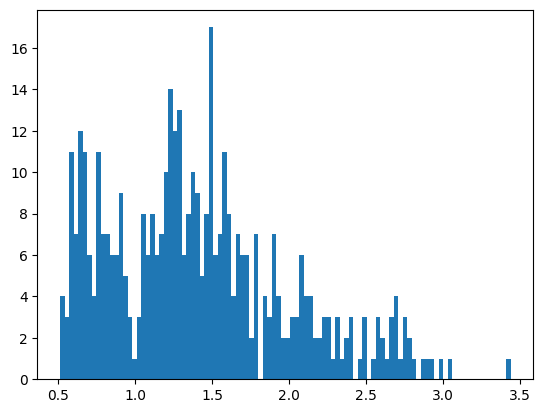

In [70]:
plt.hist(df['new_values'], bins = 100)
plt.show()


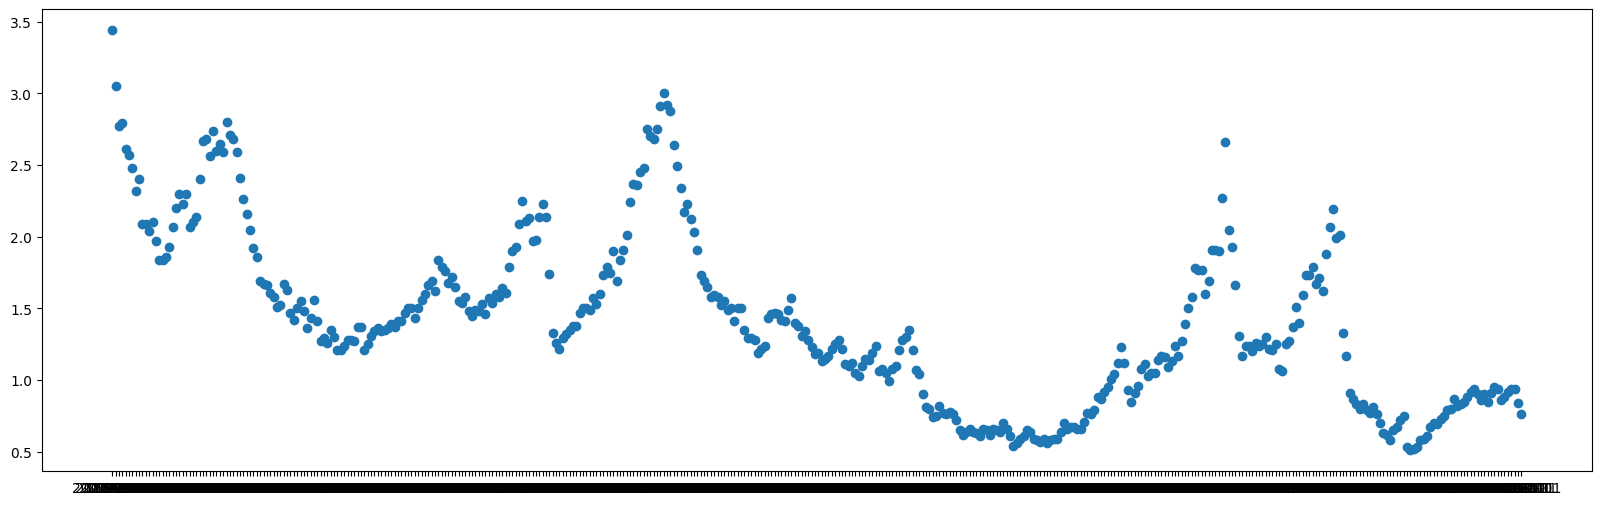

In [74]:
plt.figure(figsize=(20,6))
plt.scatter(df['date'], df['new_values'])

plt.show()

In [85]:
df.columns

Index(['date', 'new_values'], dtype='object')

In [94]:
df_yearly = len(df) / 12
df_yearly

35.0

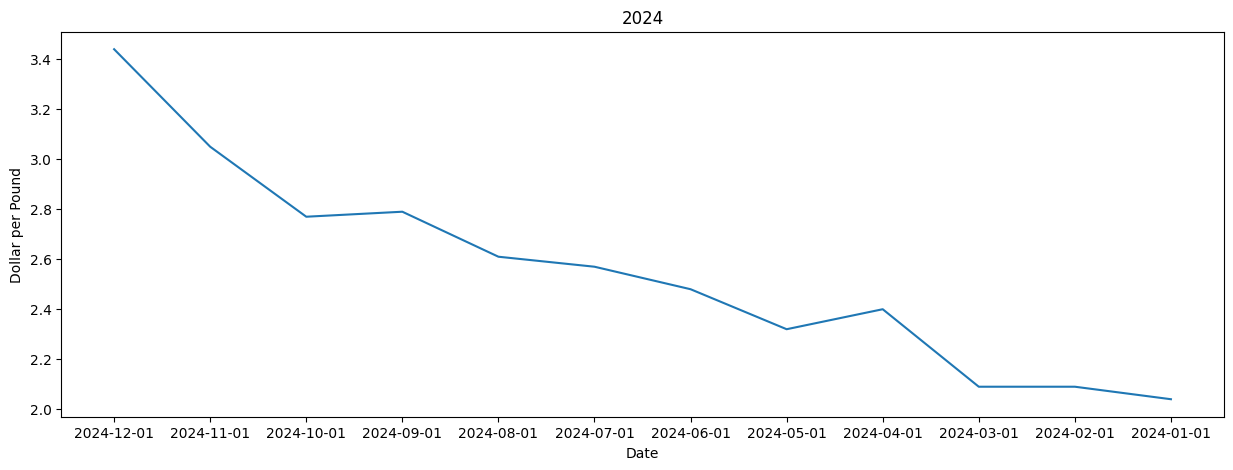

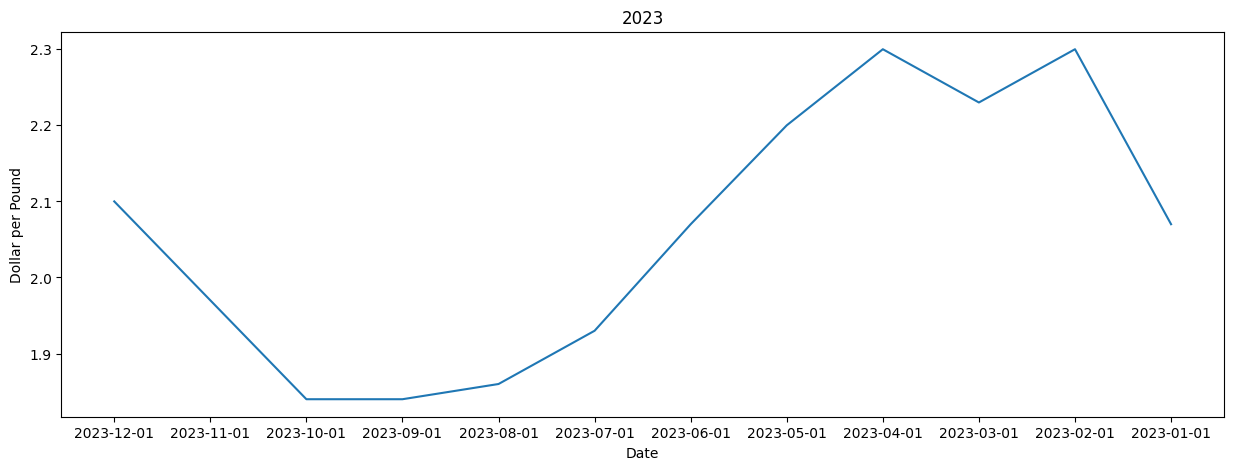

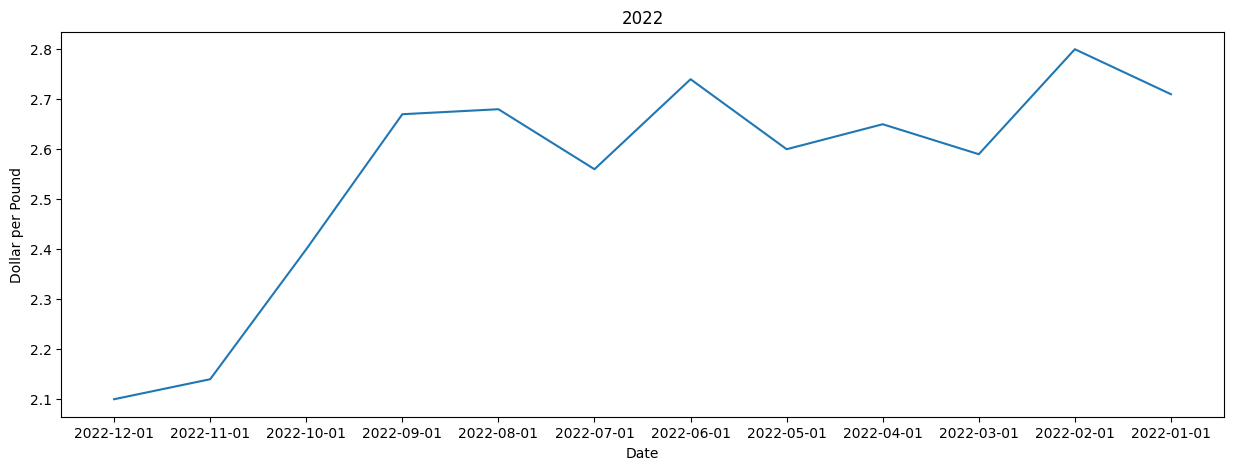

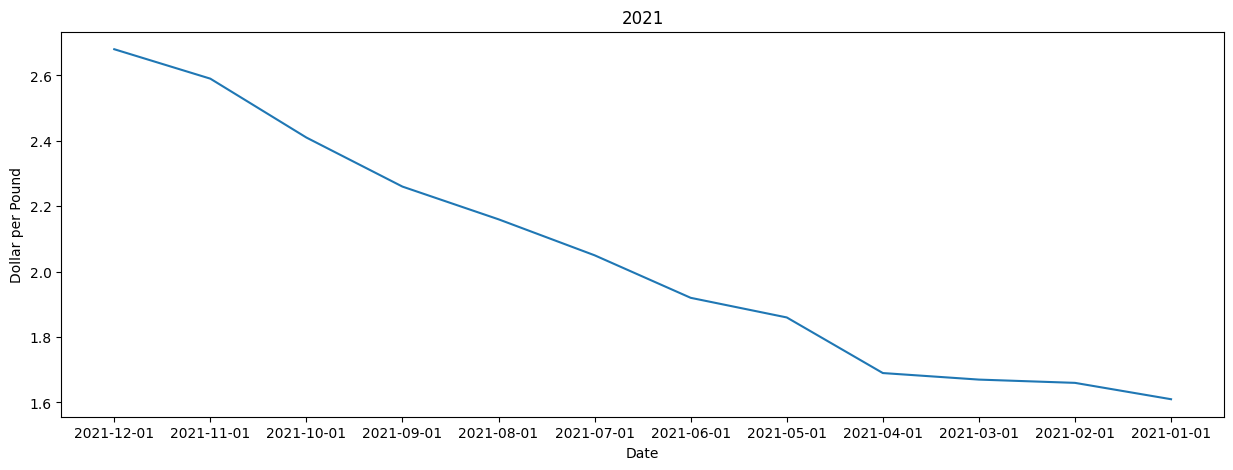

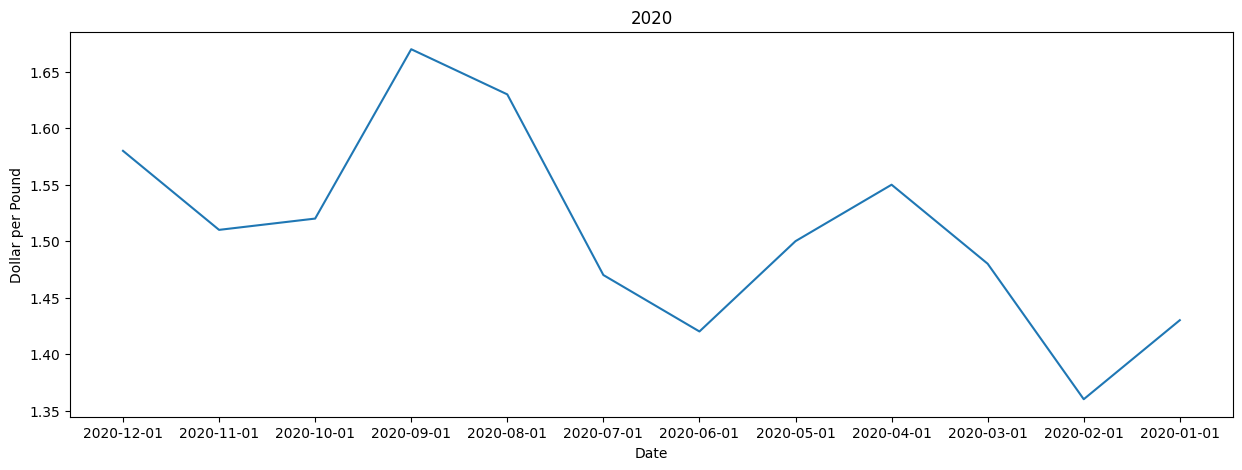

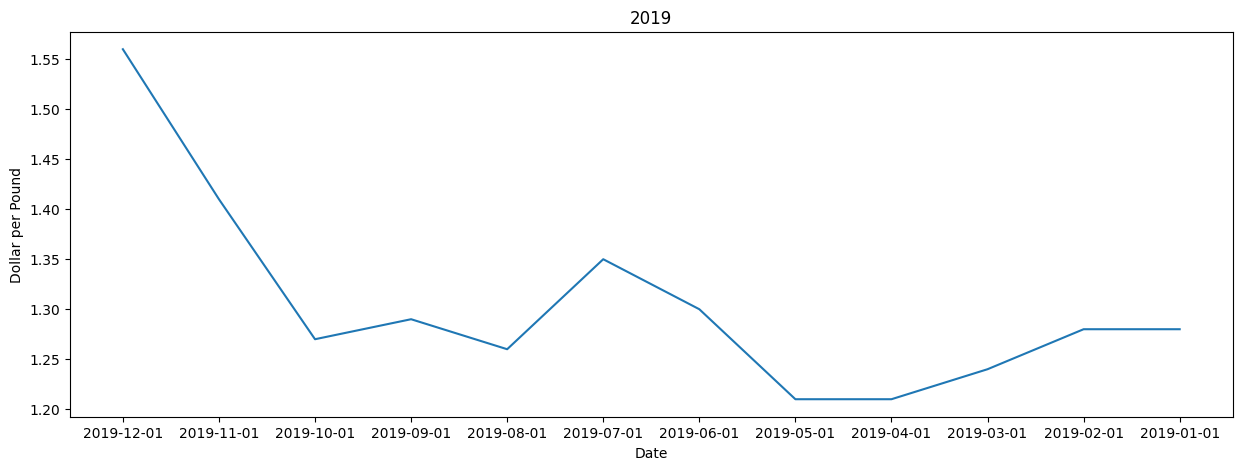

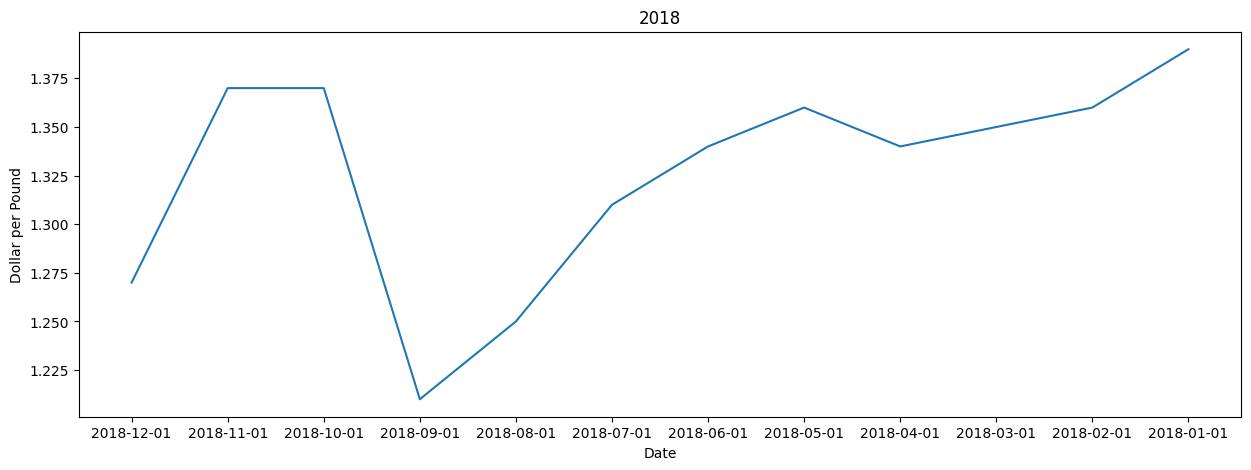

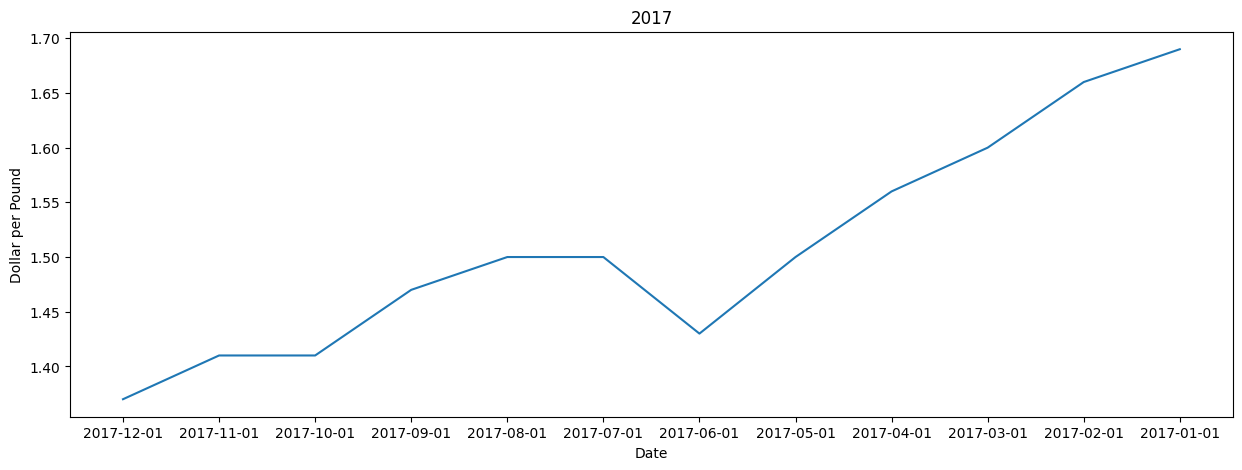

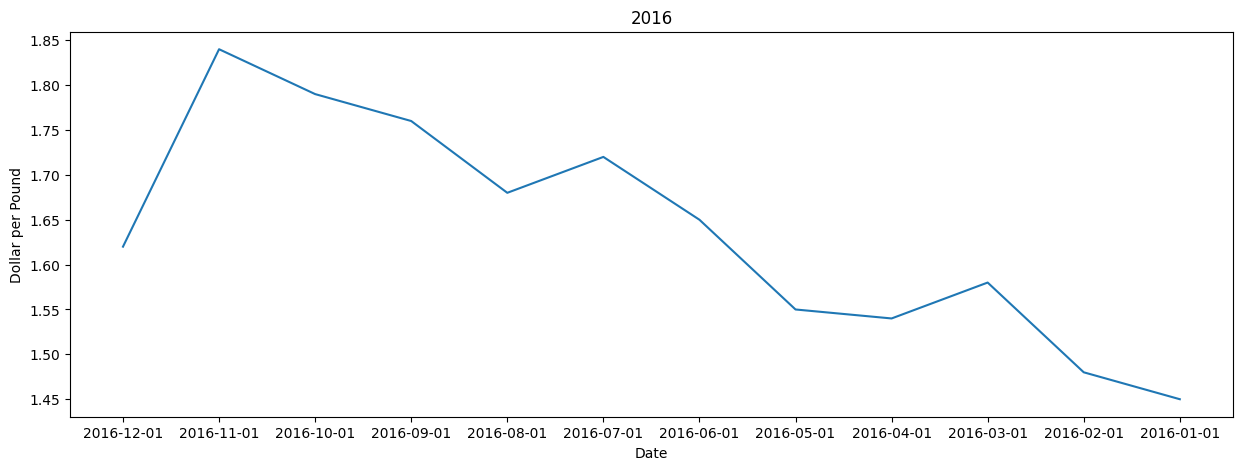

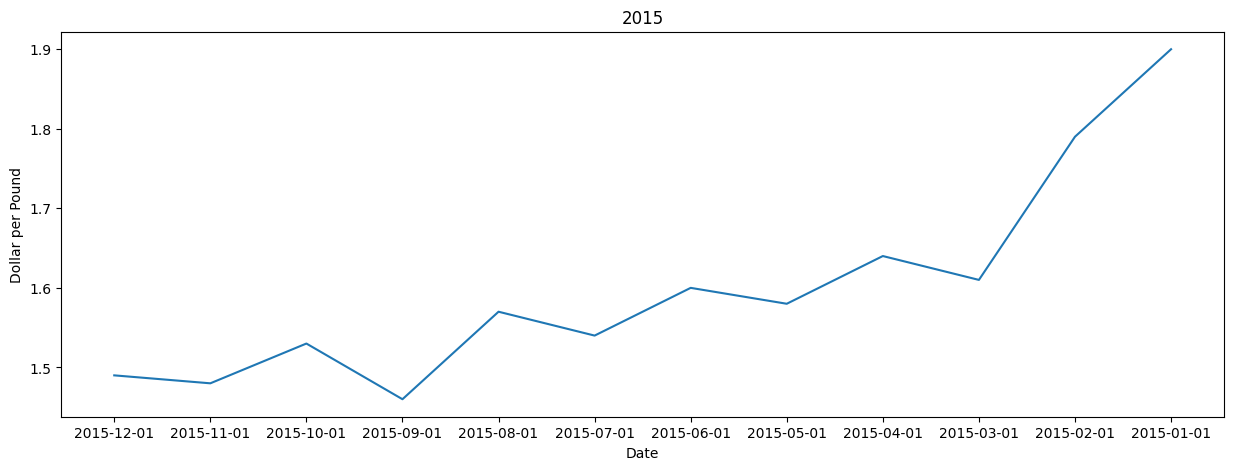

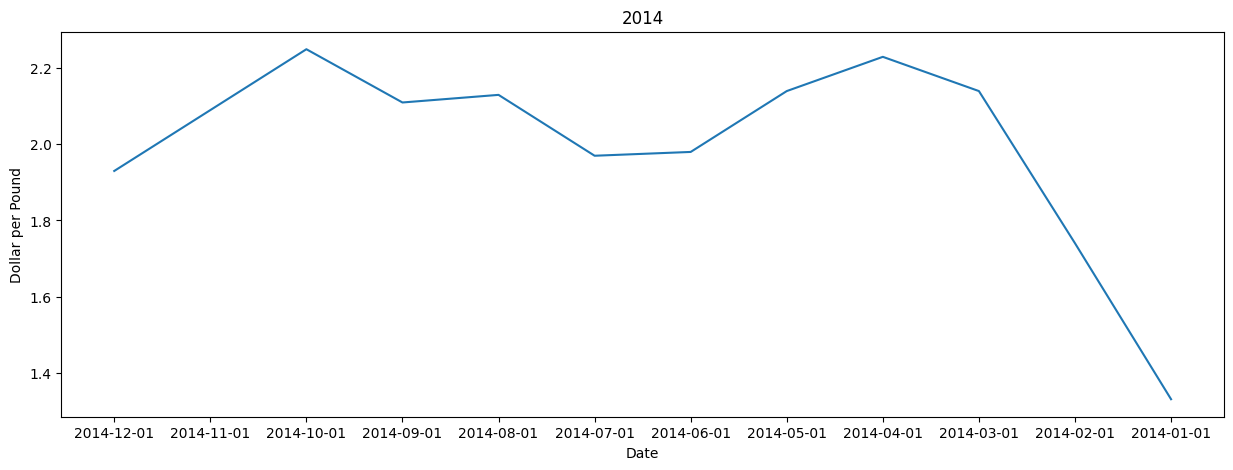

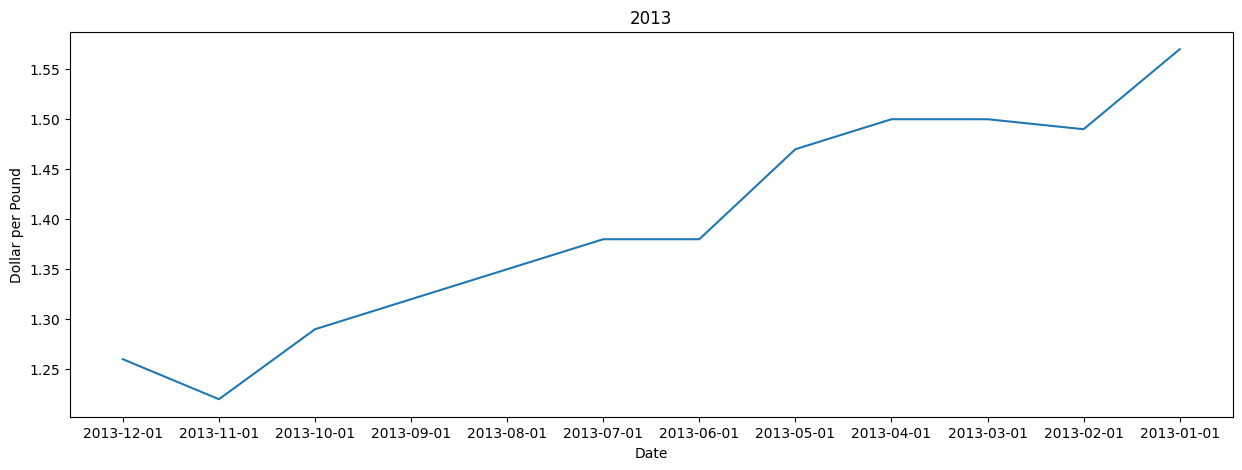

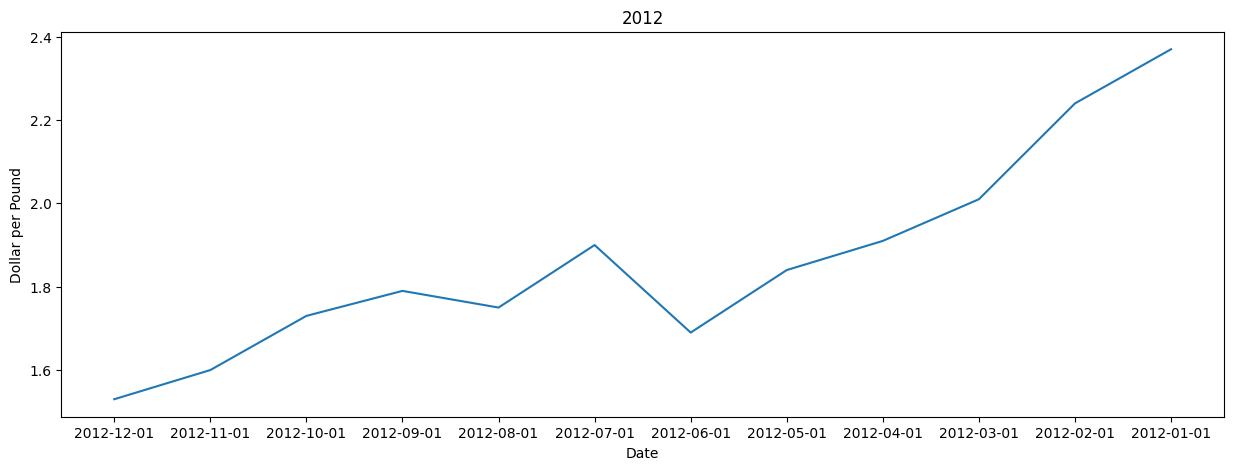

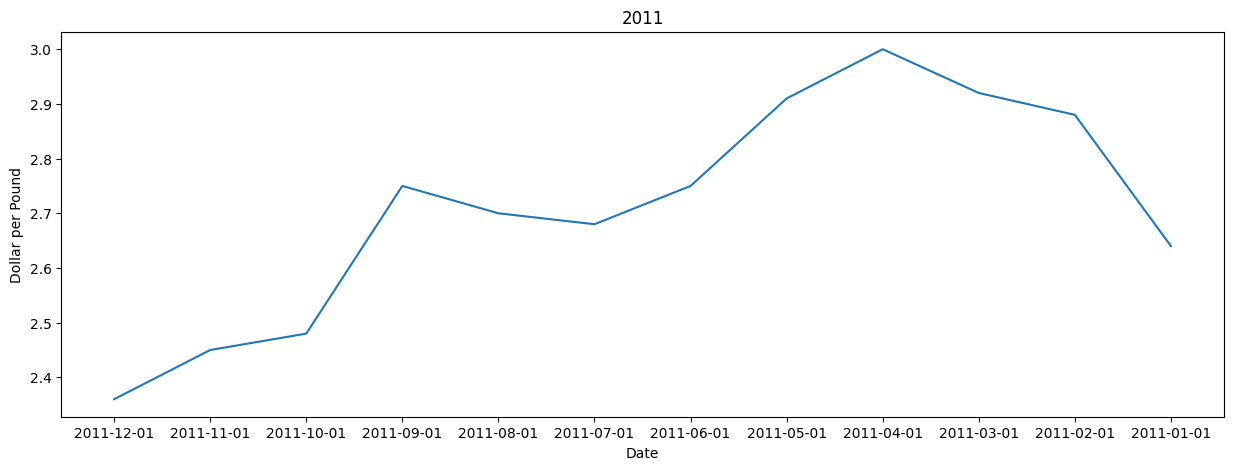

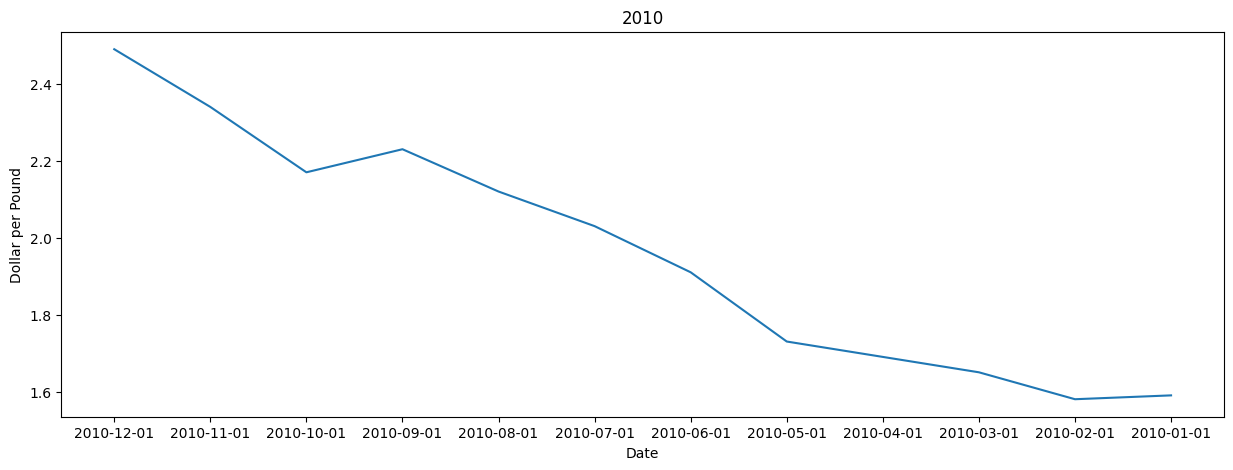

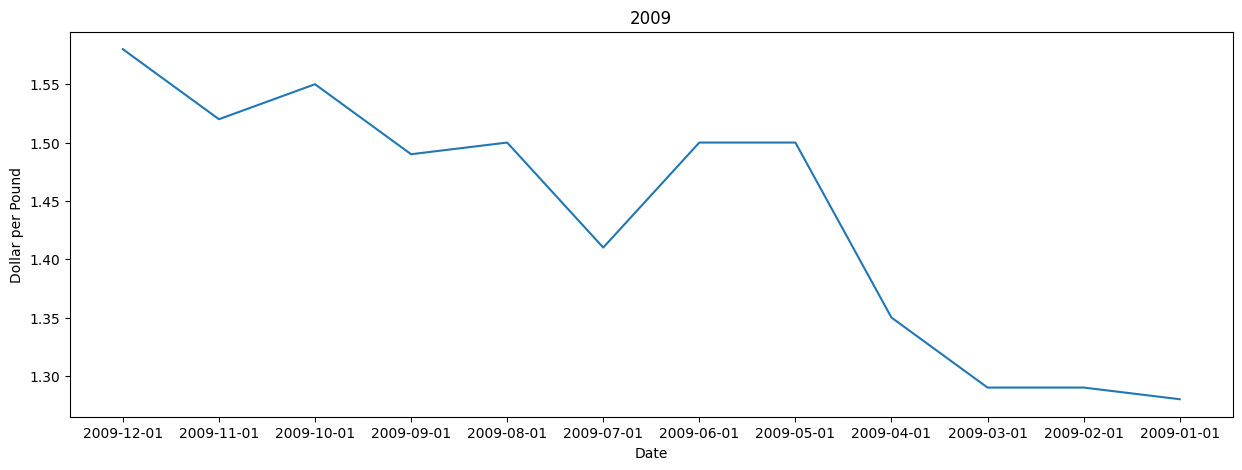

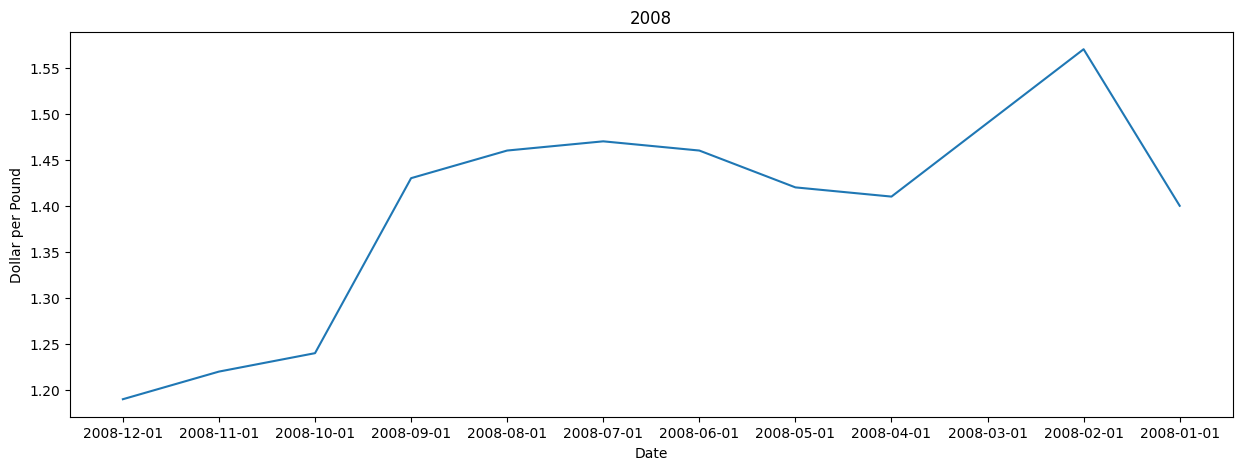

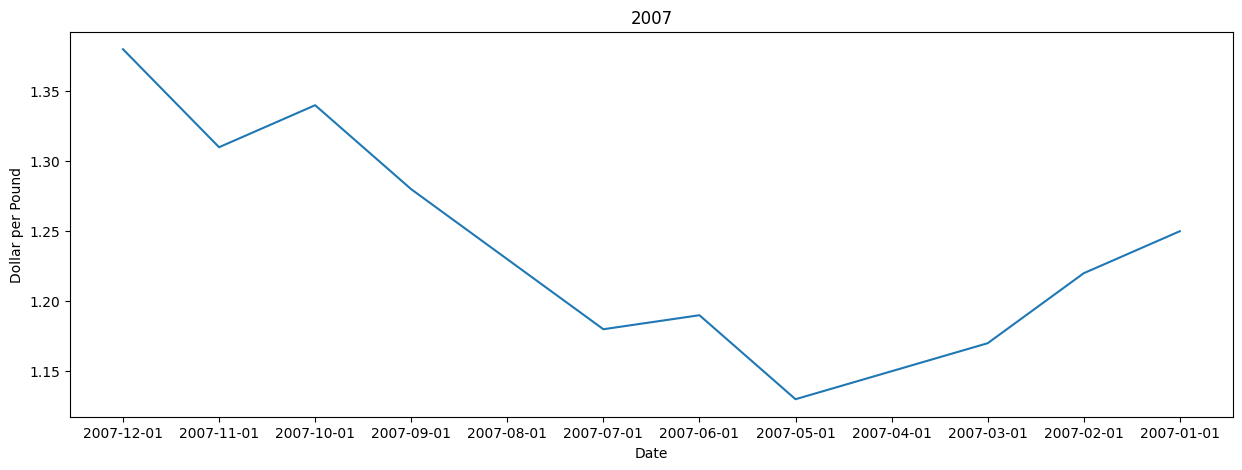

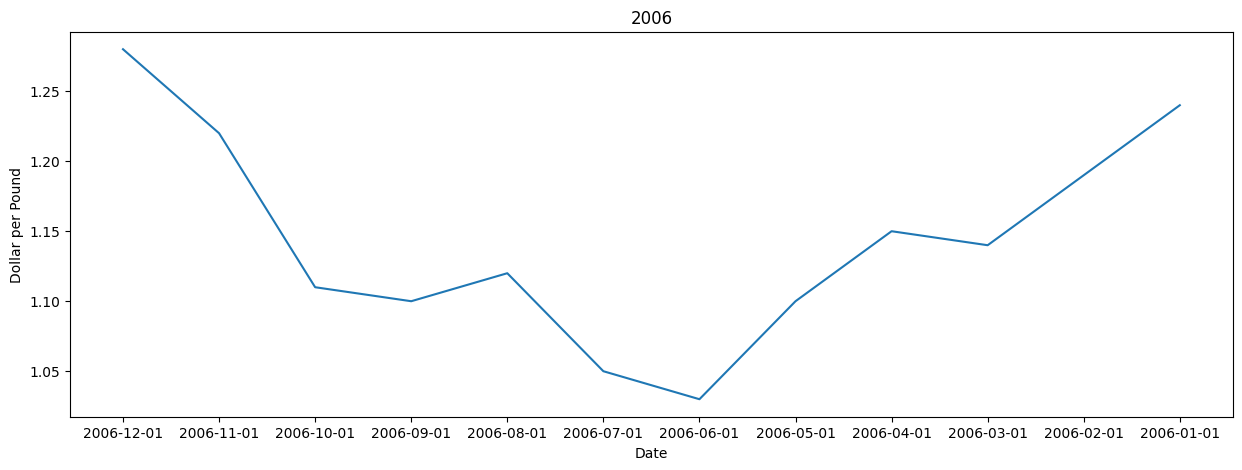

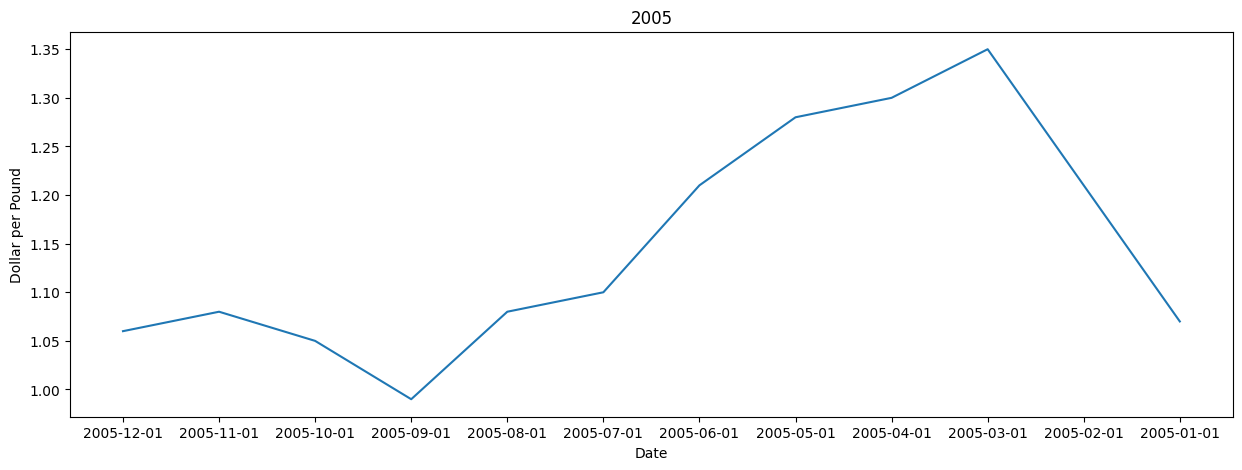

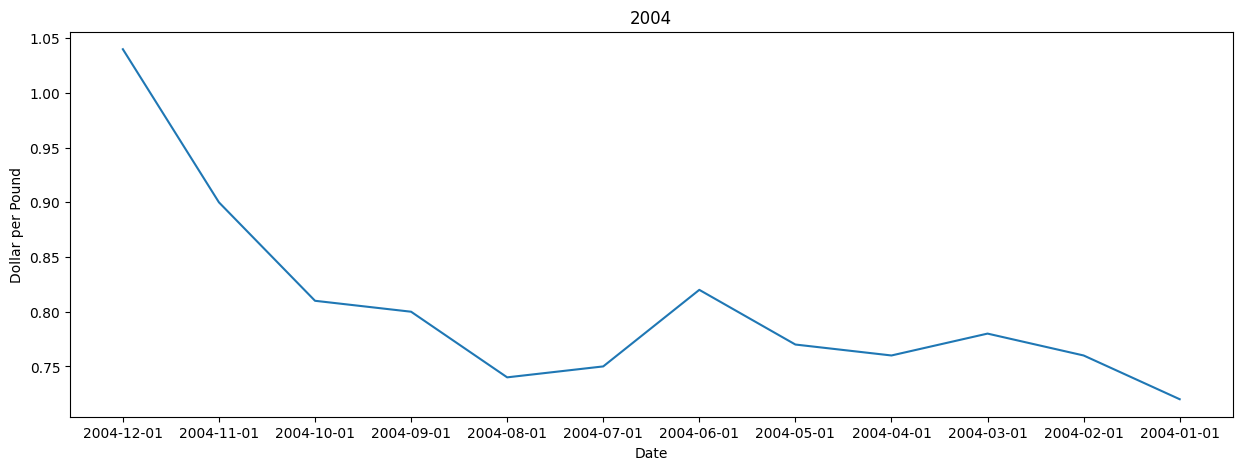

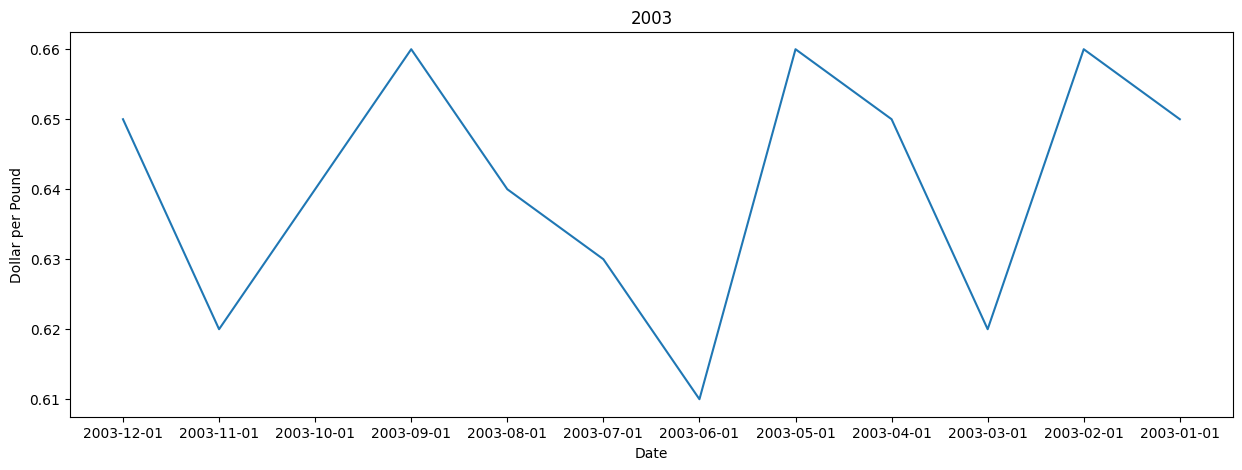

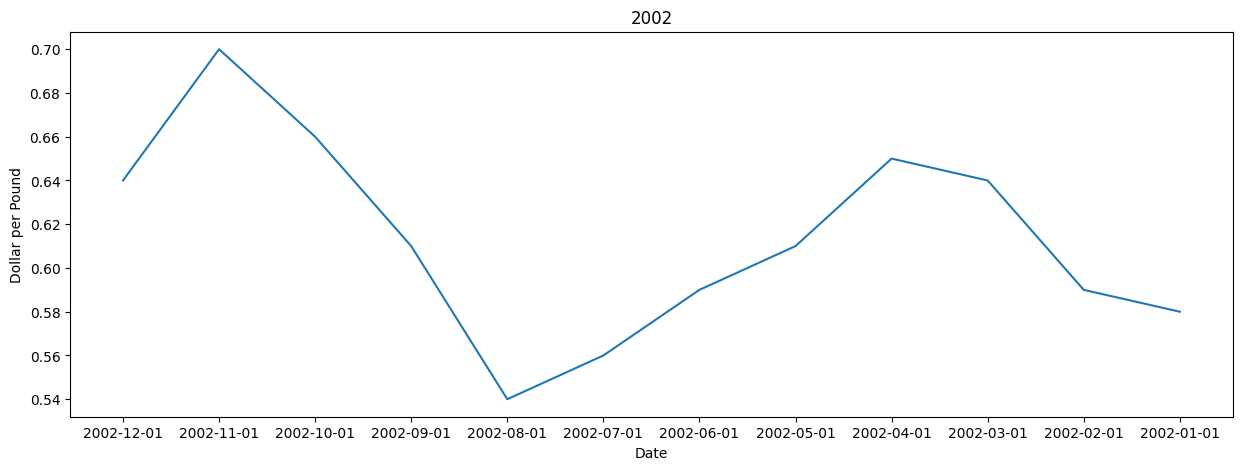

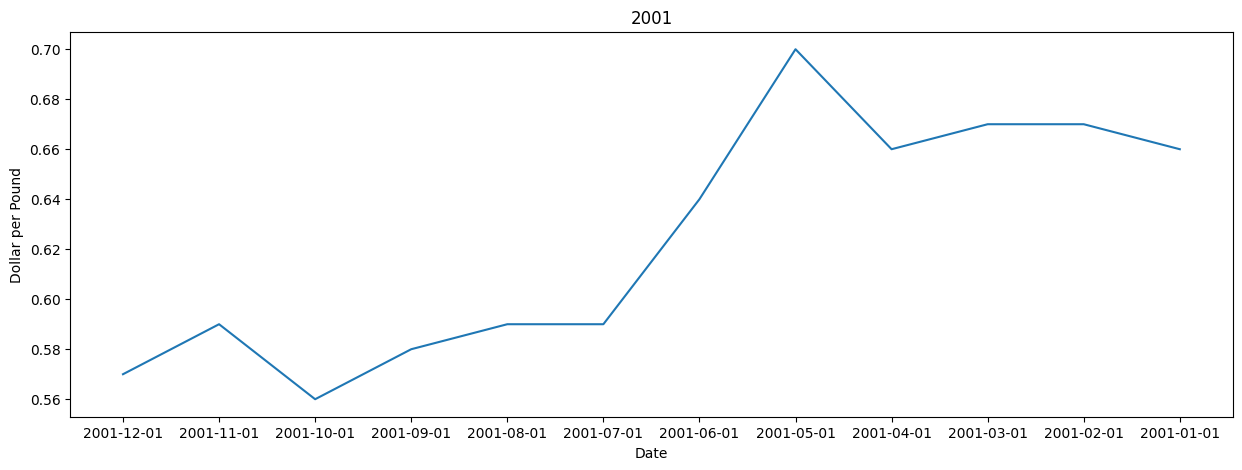

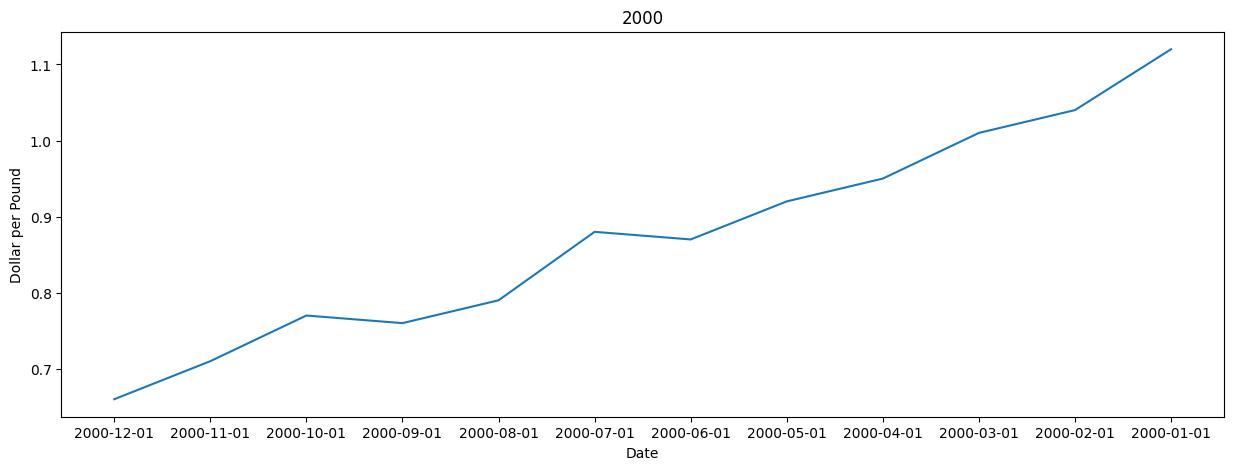

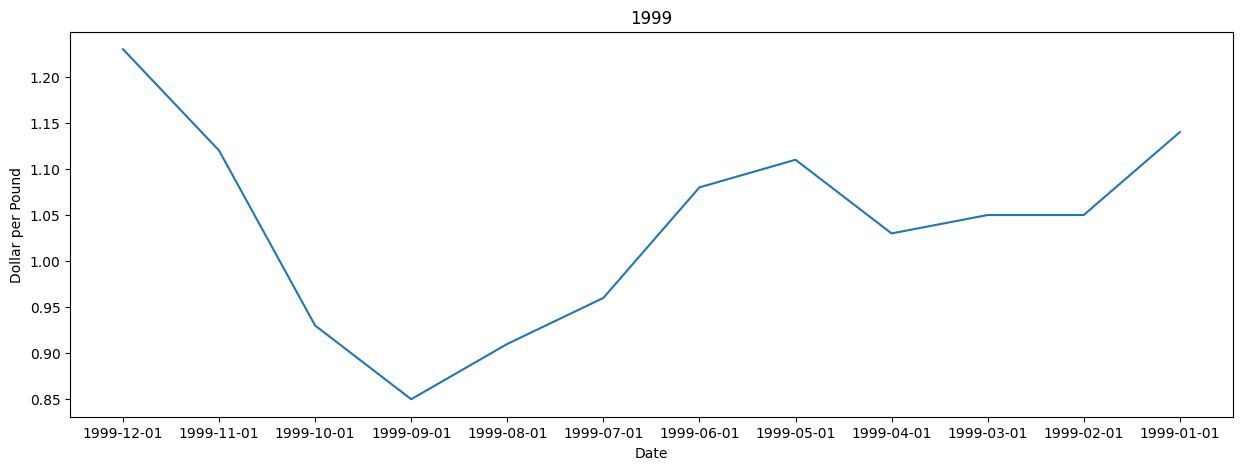

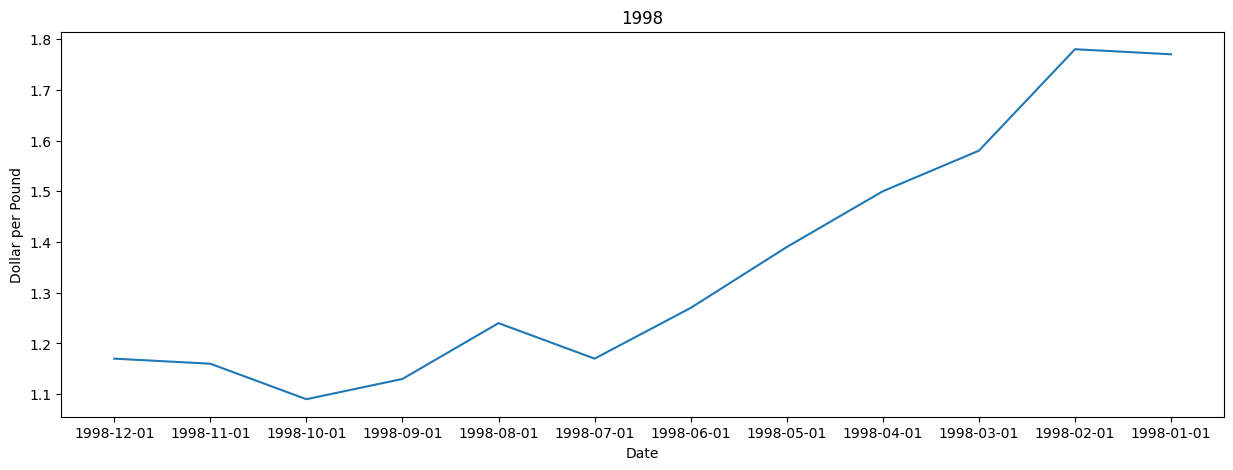

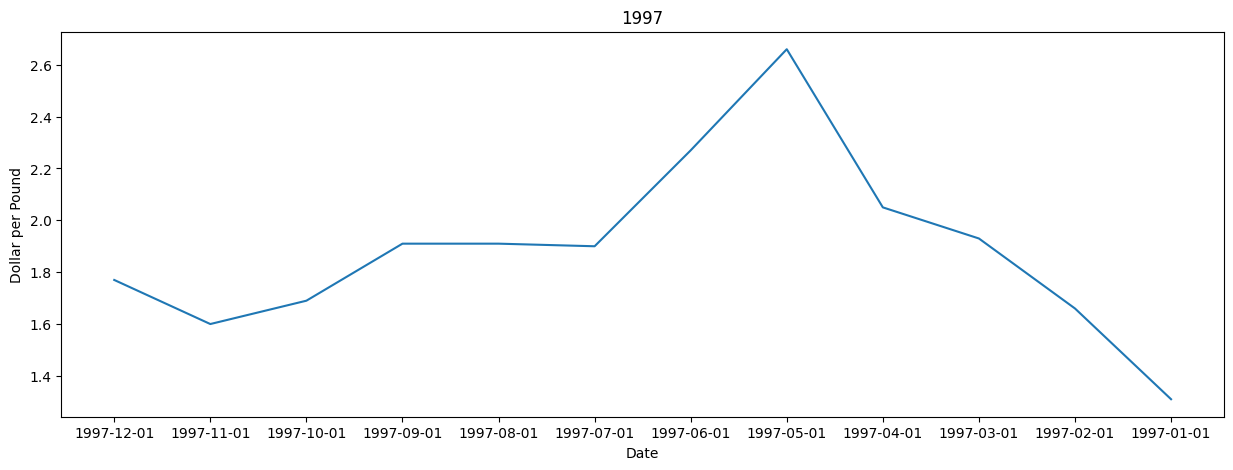

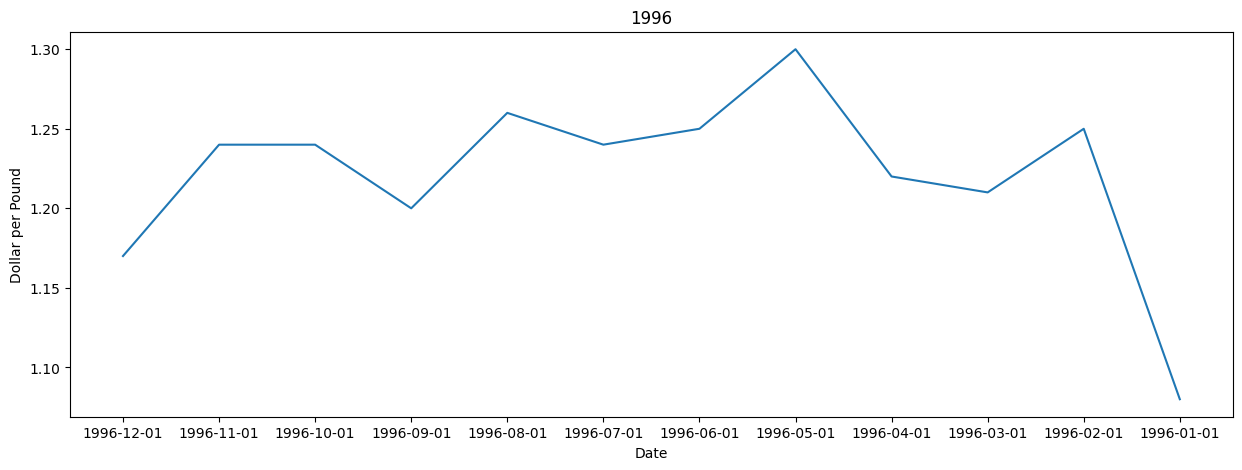

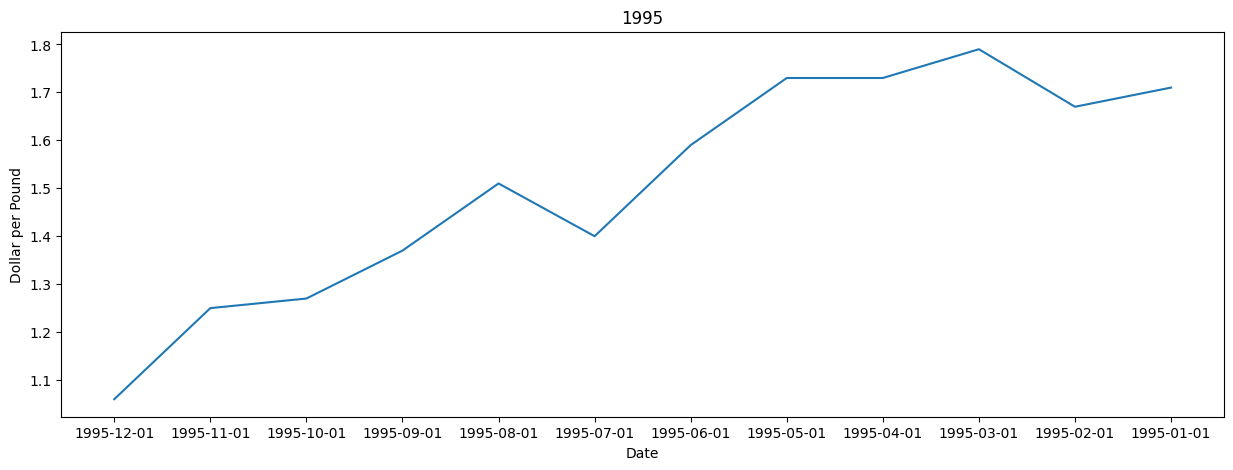

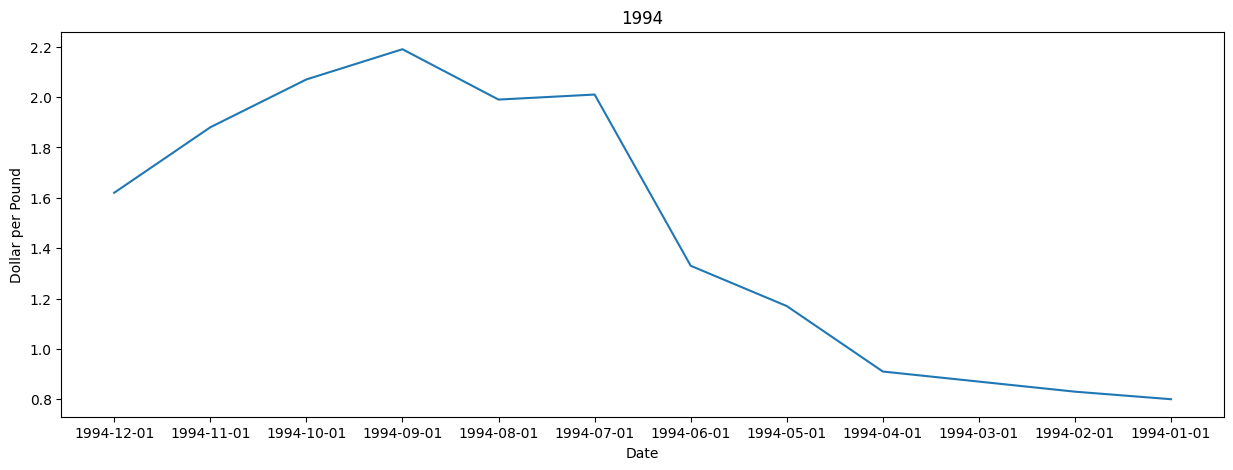

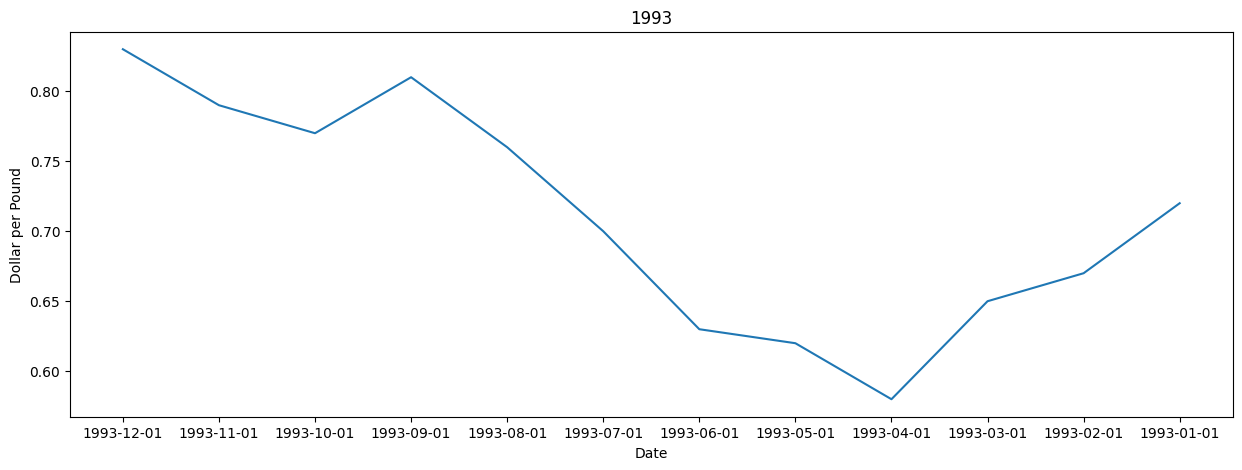

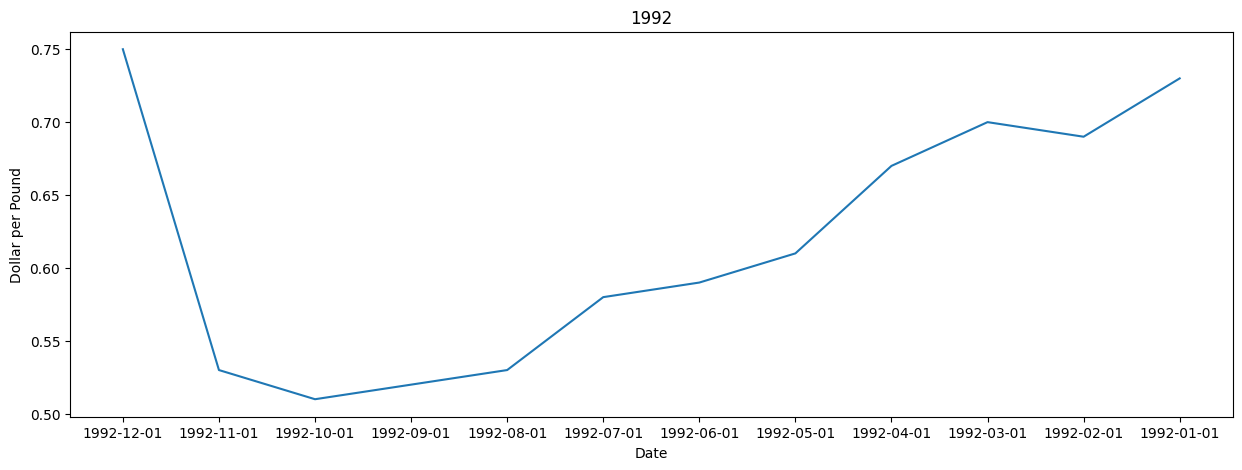

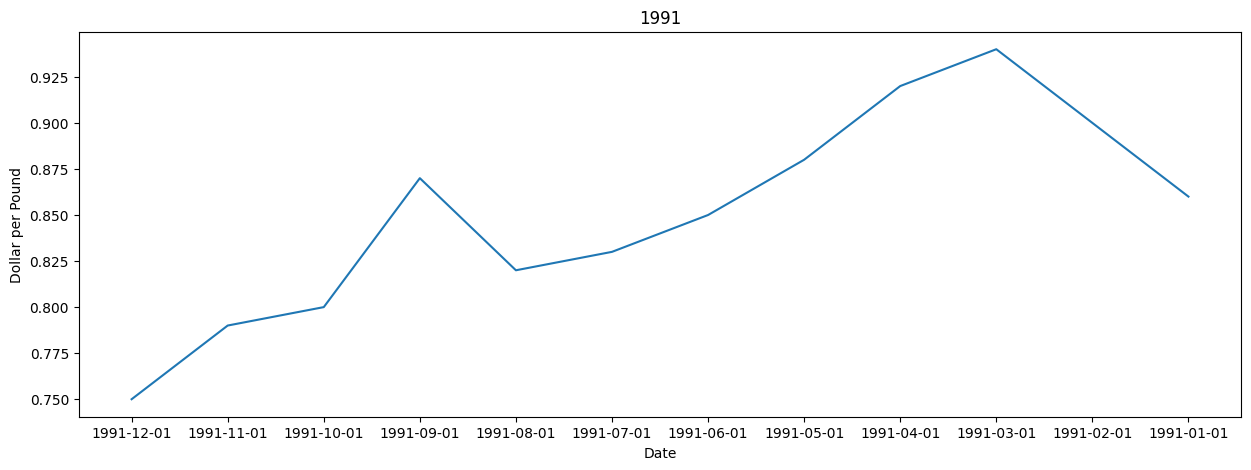

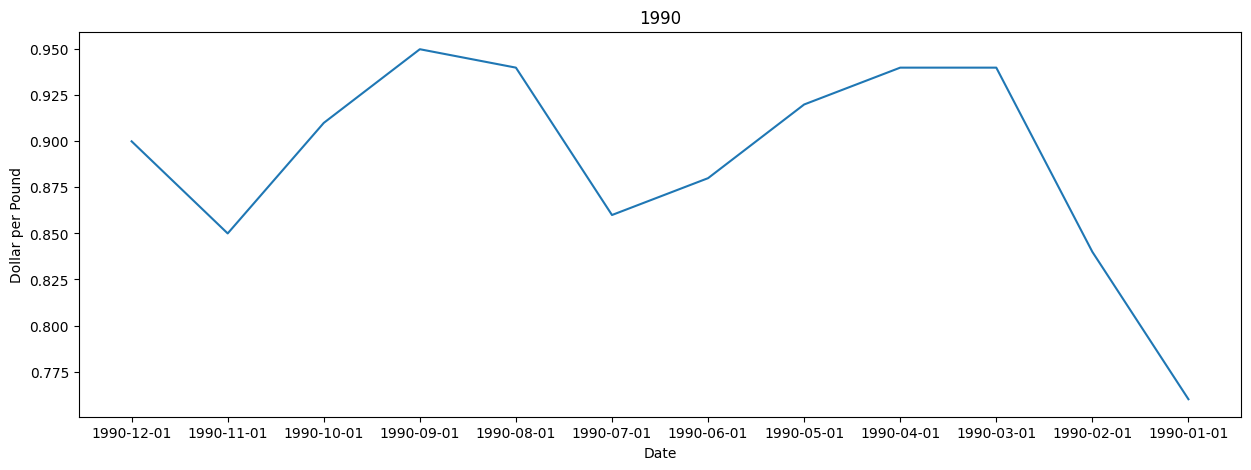

In [100]:
# Plot the price of coffee for each year

a = 0
years = list(range(2024, 1989, -1))

for i in range(int(df_yearly)):
    data = df[a:a + 12]
    plt.figure(figsize=(15,5))
    plt.plot(data['date'], data['new_values'])
    plt.xlabel('Date')
    plt.ylabel('Dollar per Pound')
    plt.title(f'{years[i]}')
    a += 12

    plt.show()
